train loss:2.2994915058137257
=== epoch:1, train acc:0.221, test acc:0.211 ===
train loss:2.297973888274116
train loss:2.2959778396420023
train loss:2.289832550758577
train loss:2.282093033625689
train loss:2.273859923512284
train loss:2.2578337525859355
train loss:2.235891109786234
train loss:2.2200094290628463
train loss:2.2019731922565913
train loss:2.167597150206558
train loss:2.1532244058007772
train loss:2.109592409483795
train loss:2.0766360515707656
train loss:1.948100859967284
train loss:1.9208425942071754
train loss:1.8647723458744474
train loss:1.781521683218545
train loss:1.7268406521818493
train loss:1.5968370212786025
train loss:1.563651662060853
train loss:1.4993426495037498
train loss:1.311683266390847
train loss:1.3408869760221558
train loss:1.1575020956741595
train loss:1.1568637669825141
train loss:1.0350898631927612
train loss:0.9646981681831664
train loss:1.0404479314940849
train loss:0.9242921816730495
train loss:0.8645061346114323
train loss:0.7623451768037869
tr

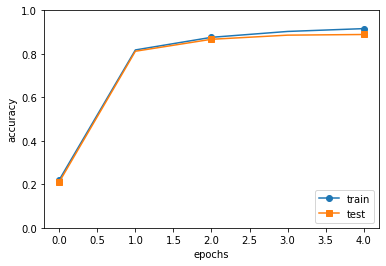

In [1]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 感想
前回までの手法よりもはるかに複雑になったので、正直正確に理解できたといえる自信はない。次回以降はフレームワークを使用して学習を行うので、せめてその使い方はきちんと習得したいと思う。
### 参考文献
ゼロから作るDeep Learning 著：斎藤康毅